# REAL ESTATE PRICE PREDICTION MODEL 

In [1]:
# Importing all the libraries required for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Retrieving the dataset to perform further operations on our given data

df = pd.read_csv("Cost_Data.csv")

In [3]:
# Printing our dataset

df

,Area (in Acres),Cost (in Thousands)
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
# Checking the shape of the dataset
df.shape

(30, 2)

In [5]:
# Checking the statistical results
df.describe()

,Area (in Acres),Cost (in Thousands)
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Process to check if any missing value is present in our dataset or not
df.isna()

,Area (in Acres),Cost (in Thousands)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
# This gives us the inference that no missing values are present in the dataset so we can move ahead with further operations 
df.isna().sum()

Area (in Acres)        0
Cost (in Thousands)    0
dtype: int64

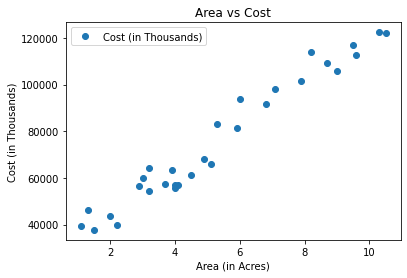

In [8]:
# Analyzing the scores by plotting the distribution

df.plot(x='Area (in Acres)', y = 'Cost (in Thousands)',style = 'o')
plt.title('Area vs Cost')
plt.xlabel('Area (in Acres)')
plt.ylabel('Cost (in Thousands)')
plt.show()

#  From the above graph we can see that there exists a linear relationship between Area and Cost.

In [9]:
# Dividing the data into features(input) and labels(output)
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [10]:
# Training and Test Splitting

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

# Implementing Linear Regression Algorithm

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

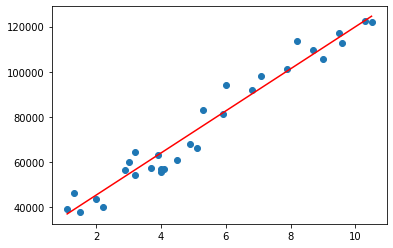

In [12]:
# Plotting the regression line 
line = regressor.coef_*X+regressor.intercept_        # y = mx + c 

# Plotting for the test data
plt.scatter(X,Y)
plt.plot(X,line,color = 'red');
plt.show()

In [13]:
# Testing our Algorithm
print(X_test)
Y_pred = regressor.predict(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


In [14]:
# Creating a dataframe of actual and predicted values 

data_frame = pd.DataFrame({'Actual': Y_test , 'Predicted': Y_pred})
data_frame

,Actual,Predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


In [15]:
# Estimating the training and test score
print("Training Score :",regressor.score(X_train,Y_train))
print("Test Score :",regressor.score(X_test,Y_test))

Training Score : 0.9411949620562126
Test Score : 0.988169515729126


In [16]:
# Predicting score for 7.0 Acres of Area

area = [[7.0]]
own_pred = regressor.predict(area)
print(f"Predicted Cost for {area} acres of area is : ",format(own_pred[0]))

Predicted Cost for [[7.0]] acres of area is :  91968.1250377325
